<a href="https://colab.research.google.com/github/Xyao2001/NN/blob/main/torch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

100%|██████████| 9912422/9912422 [00:00<00:00, 123023261.56it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 91561370.99it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 116907405.66it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4582758.90it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



60000
Label: 3


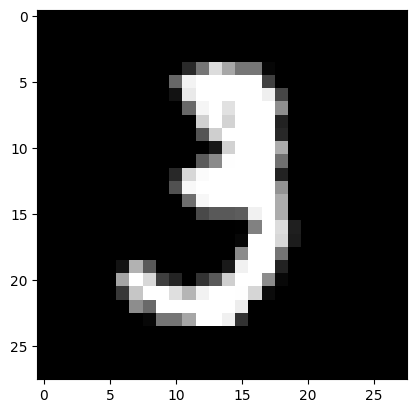

In [2]:
dataset = MNIST(root = 'data/', download = True)
print(len(dataset))
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

#The values range from 0 to 1, with 0 representing black, 1 white and the values between different shades of grey. We can also plot the tensor as an image using lt.imshow


In [3]:
mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
print(mnist_dataset)
image_tensor, label = mnist_dataset[0]

#
#The image is now convert to a 28 X 28 tensor.The first dimension is used to keep track of the color channels. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in that case the color channels would be 3(Red, Green, Blue).
print(image_tensor.shape, label)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5


An image tensor is a multi-dimensional array or data structure used to represent an image in a format that can be processed by machine learning models or computer vision algorithms. In the context of deep learning, an image tensor is typically a multi-dimensional array with three or four dimensions, depending on the color representation.

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


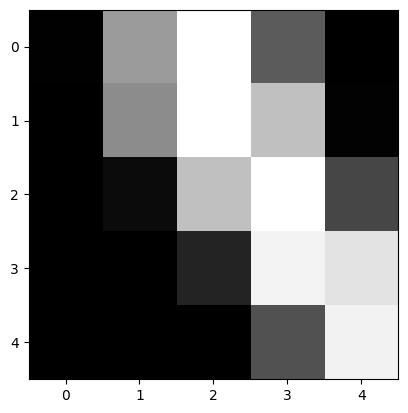

In [4]:
print(image_tensor[:,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

plt.imshow(image_tensor[0,10:15,10:15],cmap = 'gray')

In [5]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [6]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True)
#randomization helps in generalizing and speed up the process.
#e we will use DataLoaders to help us load the data in batches
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

In [7]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

## Logistic regression model
#Logistic Regression model is identical to a linear regression model
# i.e, there are weights and bias matrices, and the output is obtained using simple matrix operations(pred = x@ w.t() + b).
model = nn.Linear(input_size, num_classes)

print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)


torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0301, -0.0340, -0.0076,  ...,  0.0101,  0.0129,  0.0335],
        [ 0.0356,  0.0287, -0.0323,  ...,  0.0176, -0.0052, -0.0211],
        [ 0.0033, -0.0228, -0.0156,  ..., -0.0320, -0.0231, -0.0038],
        ...,
        [-0.0086,  0.0240,  0.0265,  ..., -0.0026, -0.0222,  0.0047],
        [ 0.0095,  0.0177,  0.0271,  ..., -0.0088, -0.0155,  0.0050],
        [-0.0239,  0.0262, -0.0158,  ..., -0.0021,  0.0308,  0.0055]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([-0.0099,  0.0142,  0.0098, -0.0283, -0.0051,  0.0183,  0.0238, -0.0147,
         0.0265,  0.0122], requires_grad=True)


In [8]:
class MnistModel(nn.Module):

    def __init__(self):

        super().__init__()
        self.linear1 = nn.Linear(input_size, 500)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(500, 128)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(128, num_classes)
        self.layers = nn.Sequential(
            nn.Linear1(input_size, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, num_classes),
            nn.Sigmoid()  # You can use nn.Softmax(dim=1) instead for multi-class classification.
        )
        #nn.Sequential(OrderedDict([




    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear1(xb)
        out = self.relu1(out)
        out = self.linear2(out)
        out=self.relu2(out)
        out=self.linear3(out)
        return out

model = MnistModel()
print(model.linear1.weight.shape, model.linear1.bias.shape)
list(model.parameters())

torch.Size([500, 784]) torch.Size([500])


[Parameter containing:
 tensor([[ 0.0174,  0.0354, -0.0130,  ...,  0.0189,  0.0178,  0.0197],
         [-0.0012,  0.0044,  0.0037,  ...,  0.0096, -0.0344,  0.0038],
         [-0.0256, -0.0238, -0.0191,  ...,  0.0319, -0.0306,  0.0016],
         ...,
         [-0.0076,  0.0267,  0.0142,  ..., -0.0197,  0.0094,  0.0018],
         [ 0.0075, -0.0352,  0.0074,  ..., -0.0150, -0.0225,  0.0167],
         [-0.0187,  0.0233,  0.0092,  ...,  0.0185,  0.0231,  0.0070]],
        requires_grad=True),
 Parameter containing:
 tensor([ 3.1766e-02,  2.9018e-02,  2.5555e-02, -2.2031e-02,  2.6725e-03,
         -1.7199e-02,  2.7267e-02,  7.9820e-03,  3.3732e-02,  9.1157e-03,
          1.9087e-02,  1.8376e-02,  7.2138e-04,  1.3581e-02,  8.2656e-03,
         -2.6124e-02,  2.2241e-02,  2.6596e-05,  3.4631e-02,  3.1141e-02,
          1.0718e-03, -2.6743e-02,  2.3324e-02,  1.3387e-02, -3.5529e-02,
          3.5140e-02, -6.9996e-03, -2.0051e-02, -1.1267e-02,  9.2644e-03,
          1.7978e-02,  3.1839e-02,  1.46

In [9]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.0502,  0.0316, -0.1546,  0.0402, -0.0019,  0.1496, -0.0256, -0.0540,
         -0.0319,  0.0622],
        [-0.0144,  0.0231, -0.1000,  0.0383,  0.0290,  0.1204,  0.0170, -0.0944,
         -0.0186,  0.0461]])


In [10]:
probs = F.softmax(outputs, dim = 1)

## chaecking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

print("\n")
## Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sample probabilities:
 tensor([[0.0952, 0.1033, 0.0857, 0.1041, 0.0999, 0.1162, 0.0975, 0.0948, 0.0969,
         0.1065],
        [0.0979, 0.1017, 0.0899, 0.1032, 0.1023, 0.1121, 0.1010, 0.0904, 0.0975,
         0.1040]])


Sum:  0.9999998807907104


tensor([5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 9, 5, 5, 5, 5,
        5, 5, 5, 9, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5,
        5, 9, 9, 5, 5, 5, 9, 5])


tensor([0.1162, 0.1121, 0.1079, 0.1105, 0.1068, 0.1188, 0.1111, 0.1093, 0.1134,
        0.1123, 0.1108, 0.1112, 0.1102, 0.1118, 0.1081, 0.1089, 0.1100, 0.1094,
        0.1094, 0.1065, 0.1100, 0.1138, 0.1142, 0.1090, 0.1112, 0.1066, 0.1104,
        0.1077, 0.1099, 0.1127, 0.1138, 0.1115, 0.1085, 0.1130, 0.1100, 0.

In [11]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ",accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

Accuracy:  tensor(0.0859)


Loss Function:  <function cross_entropy at 0x7a774c267910>


tensor(2.3012, grad_fn=<NllLossBackward0>)


In [26]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 500)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(500, 128)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(128, num_classes)
        self.layers = nn.Sequential(
            nn.Linear(input_size, 500),
            nn.ReLU(),
            nn.Linear(500, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes),
            nn.Sigmoid()  # You can use nn.Softmax(dim=1) instead for multi-class classification.
        )
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear1(xb)
        out = self.relu1(out)
        out = self.linear2(out)
        out=self.relu2(out)
        out=self.linear3(out)
        return(out)
     #is invoked when we pass a batch of inputs to the model, we flatten out the input tensor, and then pass it into self.linear.

    def training_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return({'val_loss':loss, 'val_acc': acc})

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})

    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


model = MnistModel()

In [27]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):

        ## Training Phas
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [28]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3080437183380127, 'val_acc': 0.06487341970205307}

In [31]:
history1 = fit(6, 0.01, model, train_loader, val_loader)
history2 = fit(6, 0.01, model, train_loader, val_loader)
history3 = fit(6, 0.01, model, train_loader, val_loader)
history4 = fit(6, 0.01, model, train_loader, val_loader)
history5 = fit(6, 0.01, model, train_loader, val_loader)
history6 = fit(6, 0.01, model, train_loader, val_loader)
## Replace these values with your result
history = [result0] + history1 + history2 + history3 + history4 + history5 + history6
accuracies = [result['val_acc'] for result in history]


Epoch [0], val_loss: 1.0524, val_acc: 0.7617
Epoch [1], val_loss: 0.6245, val_acc: 0.8346
Epoch [2], val_loss: 0.4913, val_acc: 0.8686
Epoch [3], val_loss: 0.4293, val_acc: 0.8820
Epoch [4], val_loss: 0.3925, val_acc: 0.8891
Epoch [5], val_loss: 0.3671, val_acc: 0.8975
Epoch [0], val_loss: 0.3490, val_acc: 0.9005
Epoch [1], val_loss: 0.3339, val_acc: 0.9044
Epoch [2], val_loss: 0.3224, val_acc: 0.9083
Epoch [3], val_loss: 0.3115, val_acc: 0.9105
Epoch [4], val_loss: 0.3020, val_acc: 0.9124
Epoch [5], val_loss: 0.2926, val_acc: 0.9152
Epoch [0], val_loss: 0.2862, val_acc: 0.9156
Epoch [1], val_loss: 0.2768, val_acc: 0.9186
Epoch [2], val_loss: 0.2706, val_acc: 0.9207
Epoch [3], val_loss: 0.2629, val_acc: 0.9243
Epoch [4], val_loss: 0.2566, val_acc: 0.9249
Epoch [5], val_loss: 0.2500, val_acc: 0.9274
Epoch [0], val_loss: 0.2435, val_acc: 0.9302
Epoch [1], val_loss: 0.2385, val_acc: 0.9306
Epoch [2], val_loss: 0.2330, val_acc: 0.9337
Epoch [3], val_loss: 0.2267, val_acc: 0.9357
Epoch [4],

In [ ]:
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')


